In [15]:
from pathlib import Path

# from dataset.encoded_dataset import _modality_list as modality_list
modality_list = ['nuclei']
gt_dir = Path('D:\\Datas\\competition\\cvpr2024\\nuclei\\gts')
# img_list = train_img_path.glob('*.png')

In [16]:
ct_list = []
modality_data_list = {m: [] for m in modality_list}
for gt_path in gt_dir.glob('*'):
    # if gt_path.name.find('CT') == 0:
    modality=gt_path.name.split('_')[0]
    modality_data_list[modality].append(gt_path)
    


In [17]:
len(modality_data_list[modality])

5426

In [18]:
import random
def split_1p(modal, items):
    split_info = {}
    sub_modal_list = set([item.name.split('_',2)[1] for item in items])
    sub_modal_list = {item:[] for item in sub_modal_list}
    for item in items:
        sub_modal = item.name.split('_', 2)[1]
        sub_modal_list[sub_modal].append(item)

    for sub_modal_name, items in sub_modal_list.items():
        random.shuffle(items)
        valid_num = int(len(items)/100)

        valid_selected = list(map(lambda x: x.stem, items[:valid_num]))
        train_selected = list(map(lambda x: x.stem, items[valid_num:]))

        split_info[f'{modal}-{sub_modal_name}'] = {'train':train_selected, 'valid':valid_selected}

    return split_info


def split_10p(modal, items):
    random.shuffle(items)
    valid_num = int(len(items)/10)

    valid_selected = list(map(lambda x: x.stem, items[:valid_num]))
    train_selected = list(map(lambda x: x.stem, items[valid_num:]))

    return {modal:{'train':train_selected, 'valid':valid_selected}}
    pass

In [19]:
split_info = {}
for m, items in modality_data_list.items():
    if len(items)>100000:
        print(m)
        t = split_1p(m, items)
        split_info.update(t)
    else:
        split_info.update(split_10p(m, items))

In [20]:
train_sum=0
valid_sum=0
train_list = []
valid_list = []
for k, v in split_info.items():
    train_num = len(v['train'])
    valid_num = len(v['valid'])
    train_list += v['train']
    valid_list += v['valid']
    print(f"{k:35s}train:{train_num:10d} valid:{valid_num:10d} | {valid_num/train_num*100:>2.2f}% sum:{train_num+valid_num:10d}")
    train_sum += len(v['train'])
    valid_sum += len(v['valid'])

print(f"{'Total':35s}train:{train_sum:10d} valid:{valid_sum:10d} | {valid_sum/train_sum*100:>2.2f}% sum:{train_sum+valid_sum:10d}")

nuclei                             train:      4884 valid:       542 | 11.10% sum:      5426
Total                              train:      4884 valid:       542 | 11.10% sum:      5426


In [21]:
import json
with open('train_list.csv', 'w') as f:
    f.write('filename\n')
    f.writelines(list(map(lambda x:x+'\n', train_list)))

with open('valid_list.csv', 'w') as f:
    f.write('filename\n')
    f.writelines(list(map(lambda x:x+'\n', valid_list)))

In [22]:
import numpy as np
a = np.ones((512,512), dtype=np.uint8)

In [23]:
a[0,0]=400

C:\Users\rnwhd\AppData\Local\Temp\ipykernel_19760\2622463981.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 400 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  a[0,0]=400


In [25]:
a[0,0]

144

In [24]:
from pathlib import Path
root_dir = Path('D:\\Datas\\competition\\cvpr2024\\raw\\train_npz\\Dermoscopy\\ISIC2018\\')
bug_path = list(root_dir.glob('*ISIC_0036137*'))[0]

In [26]:
bug_path.stem

'Dermoscopy_ISIC2018_ISIC_0036137'

In [2]:
from pathlib import Path
len(list(Path('../valid').glob('*.npz')))

3076

In [11]:
import pandas as pd
import random
a=['1','2']
b = ['1','2', '3', '5','6']

random.choices(list(filter(lambda x : x not in a, b)), k=2)

['3', '3']

['Dermoscopy_ISIC2018_ISIC_0036137.png']

In [7]:
import numpy as np
data = np.load(bug_path)

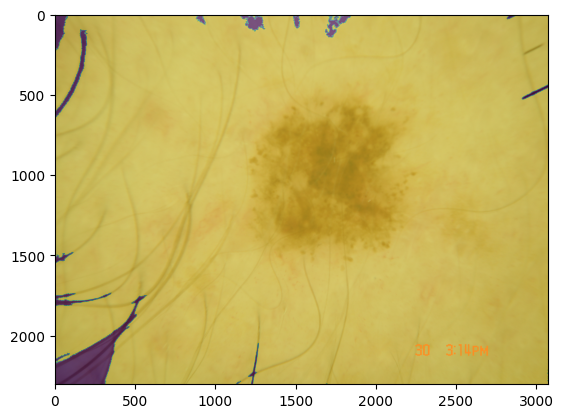

In [12]:
data['gts'].shape
import matplotlib.pyplot as plt
plt.imshow(data['imgs'])
plt.imshow(data['gts'], alpha=0.5)

In [16]:
data = np.load(list(root_dir.rglob('*MR_BraTS_T1_BraTS-GLI-01056-000*'))[0])

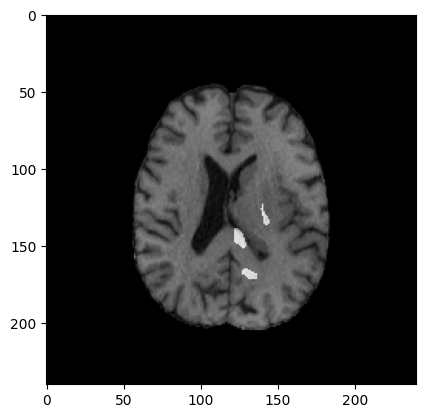

In [22]:
plt.imshow(data['imgs'][60], cmap='gray')
plt.imshow(data['gts'][60], cmap='gray', alpha=0.5)

In [23]:
data['gts'][60].max()

1